In [1]:
from linear_regression import SGDLinearRegression

from numpy.typing import ArrayLike

# Проверка корректности на синтетических данных

In [2]:
from sklearn.datasets import make_regression

In [3]:
true_bias = 5.45
X, y, true_coef = make_regression( # Генерация датасета
    n_samples=1000, n_features=5, bias=true_bias, noise=10, coef=True, random_state=42
)

In [4]:
model = SGDLinearRegression(epochs=150, lr=0.01)
model.fit(X, y)

Epoch 1/150 - loss: 4115.501772, mse: 4115.501771506727
Epoch 2/150 - loss: 3956.138401, mse: 3956.13840073145
Epoch 3/150 - loss: 3803.137421, mse: 3803.1374209451324
Epoch 4/150 - loss: 3656.243793, mse: 3656.2437930950905
Epoch 5/150 - loss: 3515.212741, mse: 3515.2127408534816
Epoch 6/150 - loss: 3379.809336, mse: 3379.809336143313
Epoch 7/150 - loss: 3249.808101, mse: 3249.8081014608315
Epoch 8/150 - loss: 3124.992628, mse: 3124.99262831143
Epoch 9/150 - loss: 3005.155211, mse: 3005.1552111040833
Epoch 10/150 - loss: 2890.096496, mse: 2890.0964958760223
Epoch 11/150 - loss: 2779.625143, mse: 2779.6251432449512
Epoch 12/150 - loss: 2673.557505, mse: 2673.5575050107086
Epoch 13/150 - loss: 2571.717314, mse: 2571.7173138518056
Epoch 14/150 - loss: 2473.935386, mse: 2473.9353855848844
Epoch 15/150 - loss: 2380.049333, mse: 2380.0493334768357
Epoch 16/150 - loss: 2289.903294, mse: 2289.903294120061
Epoch 17/150 - loss: 2203.347664, mse: 2203.347664401336
Epoch 18/150 - loss: 2120.23884

In [6]:
print("======== Сравнение с аналитическим решением ========")
print(f"Истинные веса: {true_coef}")
print(f"Найденные веса: {model.weights}\n")
print(f"Истинный bias: {true_bias}")
print(f"Найденный bias: {model.bias}")

======== Сравнение с аналитическим решением ========
Истинные веса: [28.62798621 46.07121713 16.82365791 24.74629812 18.99347437]
Найденные веса: [26.16395023 43.87030744 16.1435616  23.26814141 18.41078105]

Истинный bias: 5.45
Найденный bias: 4.736553103148304


# Проверка корректности на реальном датасете

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
def print_models_metric(models: dict, X: ArrayLike, y: ArrayLike) -> None:
    for label, model in models.items():
        y_pred = model.predict(X)
        print(
            f"{label} - r2: {r2_score(y, y_pred):.4f}, mse: {mean_squared_error(y, y_pred):.2f}"
        )

## Подготовка датасета

In [9]:
data = load_diabetes()
X, y = data.data, data.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Обучение моделей и метрики

In [11]:
sgd_model = SGDLinearRegression(epochs=200, lr=0.001, batch_size=1, verbose=False) # Чистый SGD
batch_model = SGDLinearRegression(epochs=200, lr=0.01, batch_size=32, verbose=False) # SGD по батчам
fgd_model = SGDLinearRegression(epochs=200, lr=0.01, verbose=False) # Полный GD

sgd_model.fit(X_train_scaled, y_train)
batch_model.fit(X_train_scaled, y_train)
fgd_model.fit(X_train_scaled, y_train)

models = {
    "SGD Model": sgd_model,
    "BatchGD Model": batch_model,
    "FullGD Model": fgd_model
}

In [12]:
print("======== Метрики моделей ========")
print_models_metric(models, X_test_scaled, y_test)

======== Метрики моделей ========
SGD Model - r2: 0.5197, mse: 2664.11
BatchGD Model - r2: 0.5097, mse: 2719.57
FullGD Model - r2: 0.5043, mse: 2749.49


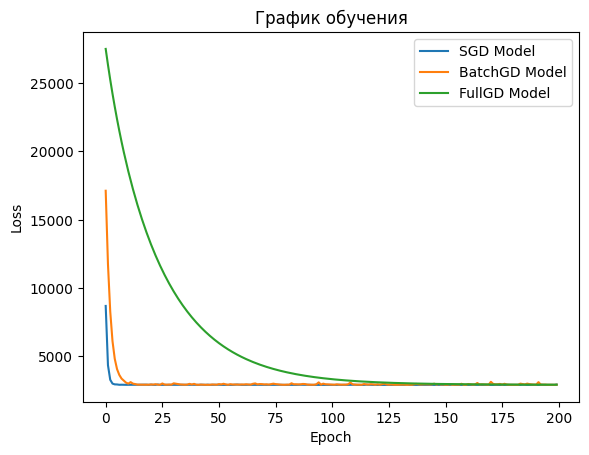

In [13]:
for label, model in models.items():
    plt.plot(model.loss_history, label=label)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('График обучения')
plt.show()

## Сравнение с LinearRegression и SGDRegressor из sklearn

In [14]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [15]:
sklearn_lr = LinearRegression().fit(X_train_scaled, y_train)
sklearn_sgd_lr = SGDRegressor(
    max_iter=200, eta0=0.001, learning_rate="constant", penalty=None
).fit(X_train_scaled, y_train)

models = {
    "My SGD LR": sgd_model,
    "sklearn SGDRegressor": sklearn_sgd_lr,
    "sklearn LinearRegression": sklearn_lr,
}

In [16]:
print("======== Сравнение с моделями sklearn ========")
print_models_metric(models, X_test_scaled, y_test)

======== Сравнение с моделями sklearn ========
My SGD LR - r2: 0.5197, mse: 2664.11
sklearn SGDRegressor - r2: 0.5090, mse: 2723.18
sklearn LinearRegression - r2: 0.5196, mse: 2664.84
